In [7]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [ ]:
def data_collector():
    possible_alfa_values_list = [
        0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
        0.5, 0.6, 0.7, 0.8, 0.9, 1
    ]

    possible_n_values = [2, 4, 8, 16, 32, 64]

    data = {}

    for alfa in possible_alfa_values_list:
        for n_value in possible_n_values:

            with open(f"benchmarks/penalty_alfa_{alfa}_n_value_{n_value}.json", "r") as file:
                data[f"penalty_alfa_{alfa}_n_value_{n_value}"] = json.load(file)

    return data

In [2]:
data = data_collector()

In [9]:
possible_alfa_values_list = [
    0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
    0.5, 0.6, 0.7, 0.8, 0.9, 1
]

possible_n_values = [2, 4, 8, 16, 32, 64]

In [12]:
for alfa in possible_alfa_values_list:
    for n in possible_n_values:
        key = f"penalty_alfa_{alfa}_n_value_{n}"
        data[key] = np.mean(data[key]["penalty_values"])

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



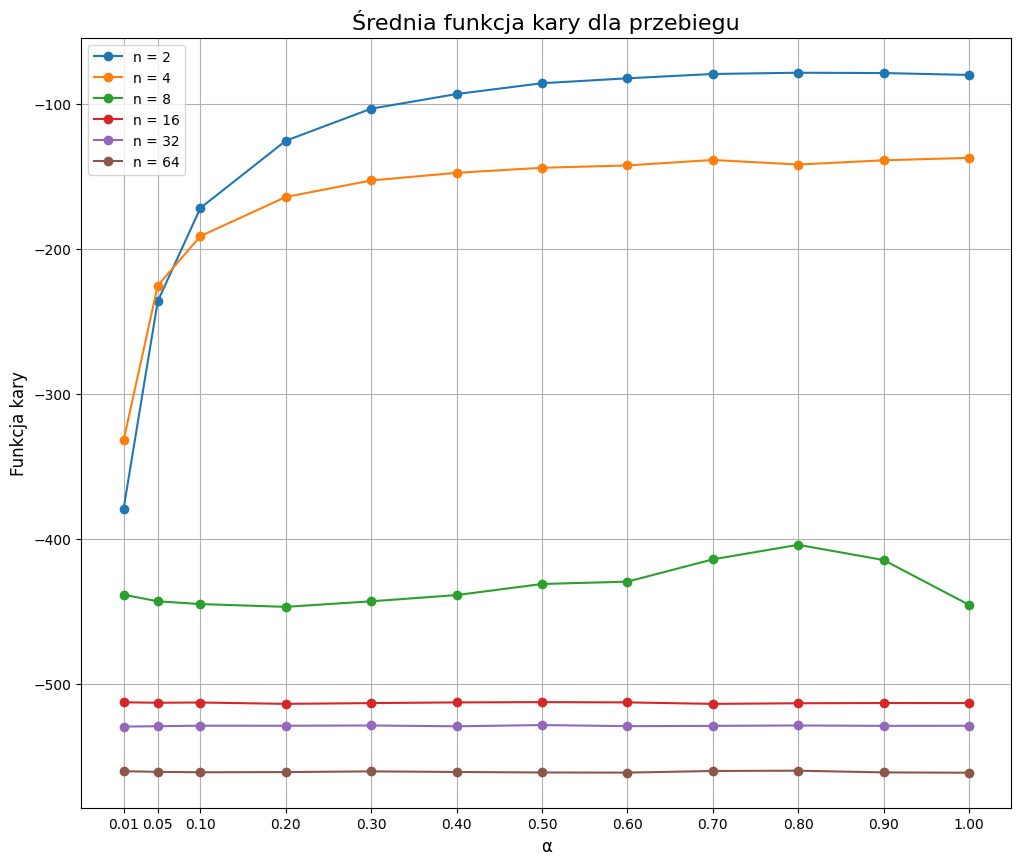

In [31]:
plt.figure(figsize=(12, 10))

for n in possible_n_values:
    alfas_values = []
    avg_penalty_values = []

    for alfa in possible_alfa_values_list:
        key = f"penalty_alfa_{alfa}_n_value_{n}"
        alfas_values.append(alfa)
        value = data[key]
        avg_penalty_values.append(value)

    plt.plot(
        alfas_values,
        avg_penalty_values,
        "o-",
        label=f"n = {n}",
    )



plt.grid()
plt.xlabel("α", fontsize=12)
plt.ylabel("Funkcja kary", fontsize=12)
plt.title(
    "Średnia funkcja kary dla przebiegu",
    fontsize=16,
)
plt.xticks(possible_alfa_values_list)
plt.legend()
plt.savefig('plots/average_penalty_function_studies.png')
plt.show()

In [22]:
n = 2
best_params = []
for alfa in possible_alfa_values_list:
    key = f"penalty_alfa_{alfa}_n_value_{n}"
    value = data[key]
    best_params.append((alfa,n,value))


In [28]:
best_params.sort(key=lambda x: x[2], reverse=True)

In [29]:
best_params

[(0.8, 2, -78.3888),
 (0.9, 2, -78.6178),
 (0.7, 2, -79.2562),
 (1, 2, -79.911),
 (0.6, 2, -82.2436),
 (0.5, 2, -85.6253),
 (0.4, 2, -93.0794),
 (0.3, 2, -103.177),
 (0.2, 2, -125.2795),
 (0.1, 2, -171.6315),
 (0.05, 2, -236.0092),
 (0.01, 2, -379.1097)]